### Naive Bayes Classification of Iris

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository. It includes three iris species with 50 samples each as well as some properties about each flower. 
![](L7-img/iris.png)

| Dataset             | Iris
|---------------------|-----------------------------------|
| Number of Instances | 150 (50 per class) |
| Number of Attributes | 4 numeric                        |
| Attribute            | Sepal length/cm               |
| Attribute            | Sepal width/cm                |
|  Attribute           | Petal length/cm               |
|  Attribute           | Petal width/cm                |
| class                | Iris-Setosa                      |
| class                | Iris-Versicolour                 |
| class                | Iris-Virginica                   |







In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns

# import some data to play with
iris = datasets.load_iris()
column_names = iris.feature_names

# Show the data head
print(iris.data[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [2]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=column_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


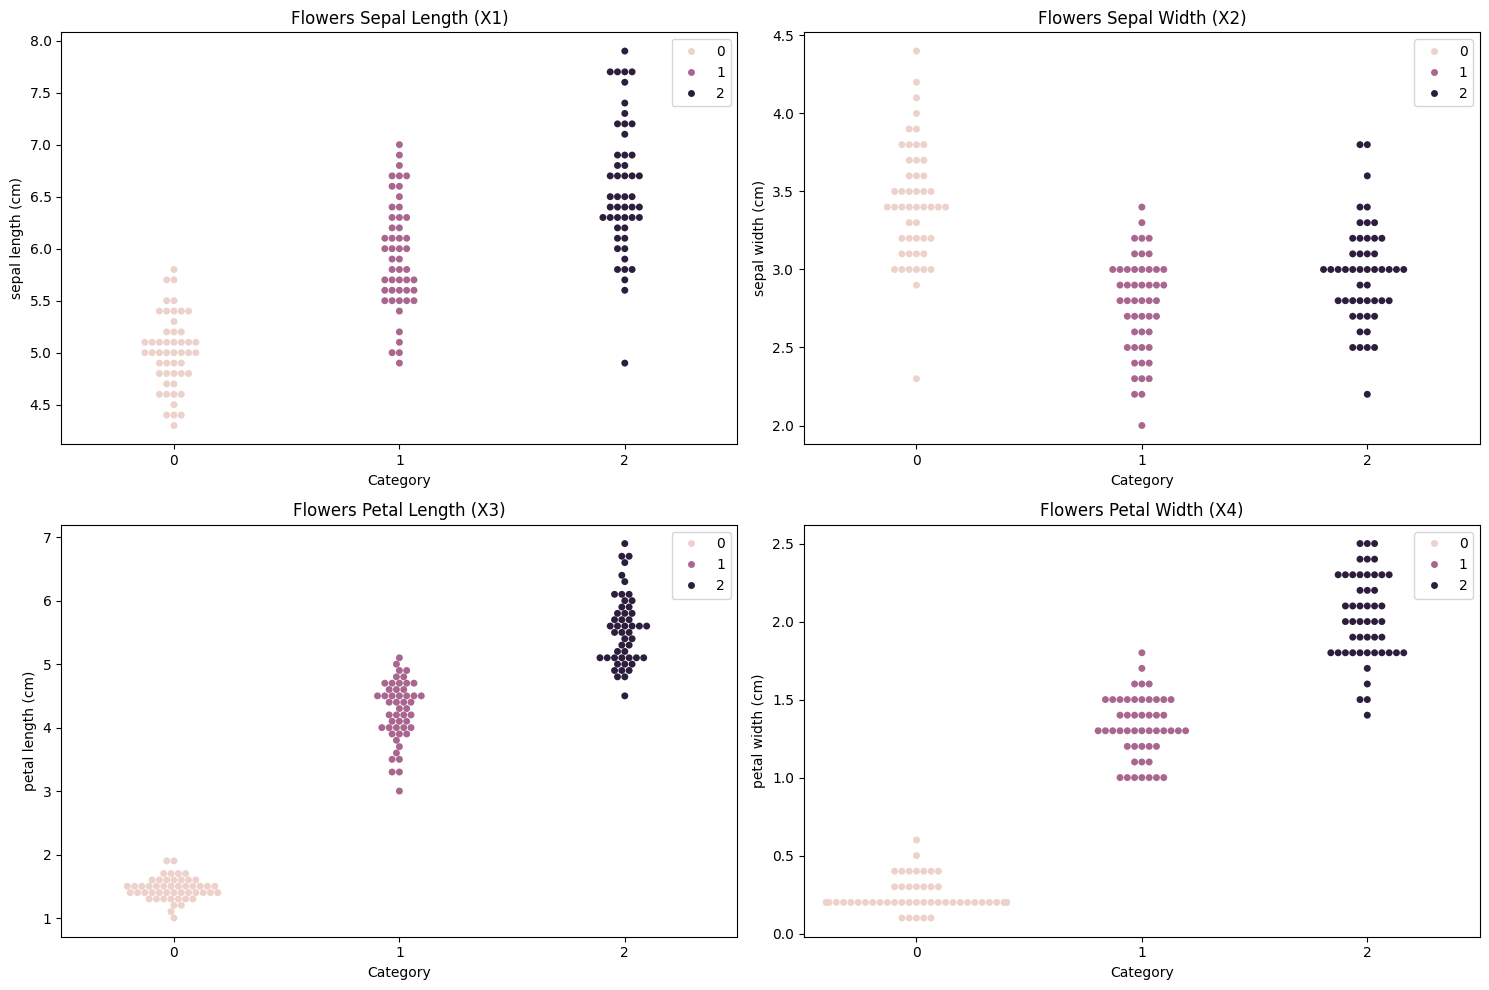

<Figure size 640x480 with 0 Axes>

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
y = iris.target

# Feature names and titles for the plots
features = iris.data.T
titles = [
    'Flowers Sepal Length (X1)',
    'Flowers Sepal Width (X2)',
    'Flowers Petal Length (X3)',
    'Flowers Petal Width (X4)'
]
y_labels = column_names

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot each feature in a subplot
for i, ax in enumerate(axes.flat):
    sns.swarmplot(ax=ax, x=y, y=features[i], hue=y)
    ax.set_title(titles[i])
    ax.set_xlabel('Category')
    ax.set_ylabel(y_labels[i])

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

# Adjust layout
plt.tight_layout()
plt.show()

### Question
1. What can you say about the two features plotted above with regards to the use of it for classification? (Hint: can you use them for classification?)

### Answer
1. Based on the 4 features plotted above, it seems that classification can be used to determine the type of flowers. However, we need to use a classification algorithm to get the probability of the classification based on each feature's values.

### Naive Bayes Classifier




We want to calculate this:

$P(y|X) = \frac{P(X|y)P(y)}{P(X)}$

Where y is the class variable and X is the feature vector of size N. N tells us how many different types of X attributes there are - eg sepal width, sepal length, etc. 

So $P(y|X)$ would be the probability of class y given the X attribute (eg sepal length, sepal width). That is if we have an X attribute value , what is its probability for it belonging to class y=0, y=1, y=2. 

This is exactly what the classifier does, given whatever value of X, find out which class it most probably belongs to. 

We can find $P(y|X)$ by this formula (assuming that X attributes are all independent): 

$P(y|x_{1},..,x_{n}) = \frac{P(x_{1}|y)P(x_{2}|y) ... P(x_{n}|y)P(y)}{P(x_{1})P(x_{2})... P(x_{n})}$

Where $x_{1}$ is the sepal width attribute, $x_{2}$ is sepal length attribute, etc.

Can be rewritten as: 

$P(y|x_{1},..,x_{n}) =\frac{P(y)\prod_{i=1}^{n}{P(x_{i}|y)}} {P(x_{1})P(x_{2})... P(x_{n})}$

$P(y|x_{1},..,x_{n}) \propto P(y)\prod_{i=1}^{n}{P(x_{i}|y)}$

We just need to calculate $P(x_{i}|y)$

We call this approach **naive bayes** because it is naive to assume that the attributes are independent, i.e. the attributes do not influence each other. For example we assume that the petal length and width are not influenced by each other. Nevertheless this assumption works well in many cases. 

In order to make it easy to calculate $P(x_{i}|y)$ we put the continous data into discrete bins. To calculate the probability we simply count the number of data points in each bins per class. 

In this example because X is continous need to discretize it into bins. It makes it easier for us to calculate as we just need to count and divide them. 

NOTE: This is just a demo, there are better ways to deal with continuous values. 

So in our example the continous X values are put into 6 separate bins (or categories). You can try to see if more bins are better.

[0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 3. 3. 4. 2. 3. 3. 3. 2. 3. 2. 2. 2. 2. 3. 2. 3. 3. 2. 3. 2. 3. 2.
 4. 3. 2. 3. 3. 4. 3. 2. 2. 2. 2. 4. 3. 3. 3. 3. 2. 2. 3. 3. 2. 2. 2. 2.
 2. 2. 2. 2. 5. 4. 5. 5. 5. 5. 3. 5. 5. 5. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4.
 5. 4. 5. 4. 5. 5. 3. 4. 5. 5. 5. 5. 5. 4. 5. 5. 5. 4. 3. 4. 5. 4. 4. 5.
 5. 4. 4. 4. 4. 4.]


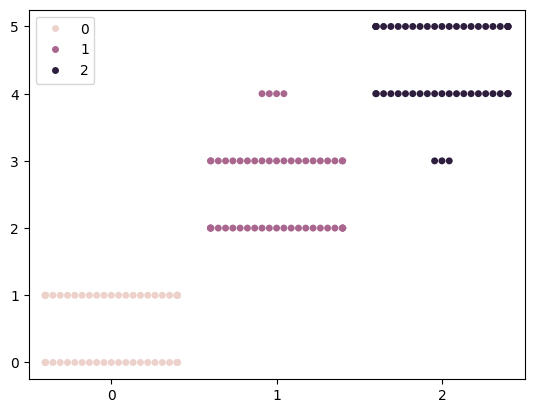

In [8]:
from sklearn import preprocessing
X = iris.data[:,2] #petal length
X = X.reshape(-1, 1)
enc = preprocessing.KBinsDiscretizer(n_bins=6, encode='ordinal').fit(X)
X_binned = enc.fit_transform(X)

X_binned = X_binned.squeeze() # make 1-d array
print(X_binned)
ax=sns.swarmplot(x=y,y=X_binned,hue=y)

From the above data, we count how many data points are in X1 bins for each class Y. Fill up the last row.

| X1=0 | X1=1 | X1=2 | X1=3 | X1=4 | X1=5 | Y |
|------|------|------|------|------|------|---|
| 24   | 26   | 0    | 0    | 0    | 0    | 0 |
| 0    | 0    | 25   | 21   | 4    | 0    | 1 |
| 0    | 0    | 0    | 3    | 22   | 25   | 2 |


Do the same with another attribute (see below)


Sepal Length: [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]

Reshaped X: [[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]


/Users/ijosh/Documents/GitHub/data-science/.venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


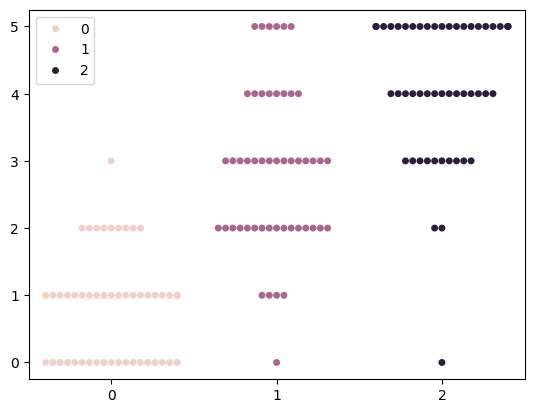

array([4.3, 5. , 5.4, 5.8, 6.3, 6.7, 7.9])

In [5]:
X = iris.data[:, 0]  # sepal length
print("Sepal Length:", X)
X = X.reshape(-1, 1)
print("\nReshaped X:", X)

enc = preprocessing.KBinsDiscretizer(n_bins=6, encode='ordinal').fit(X)
print("\nBin Encoding:", enc)

X_binned = enc.fit_transform(X)
print("\nX binned encoding:", X_binned)

X_binned = X_binned.squeeze()  # make 1-d array
print("\nSqueezed binned X:", X_binned)

# Count the values in each bin for each class
for class_label in np.unique(y):
    class_binned = X_binned[y == class_label]
    bin_counts = np.bincount(class_binned.astype(int), minlength=6)
    print(f"Y = {class_label}: {bin_counts}")

# Plot the swarmplot
ax = sns.swarmplot(x=y, y=X_binned, hue=y)
plt.show()
enc.bin_edges_[0]  # bin category

### Sepal Length (cm)
| X1=0 | X1=1 | X1=2 | X1=3 | X1=4 | X1=5 | Y |
|------|------|------|------|------|------|---|
| 24   | 26   | 0    | 0    | 0    | 0    | 0 |
| 0    | 0    | 25   | 21   | 4    | 0    | 1 |
| 0    | 0    | 0    | 3    | 22   | 25   | 2 |

### Sepal Width (cm)
| X2=0 | X2=1 | X2=2 | X2=3 | X2=4 | X2=5 | Y |
|------|------|------|------|------|------|---|
| 20   | 20   | 9    | 1    | 0    | 0    | 0 |
| 1    | 4    | 16   | 15   | 8    | 6    | 1 |
| 1    | 0    | 2    | 10   | 15   | 22   | 2 |


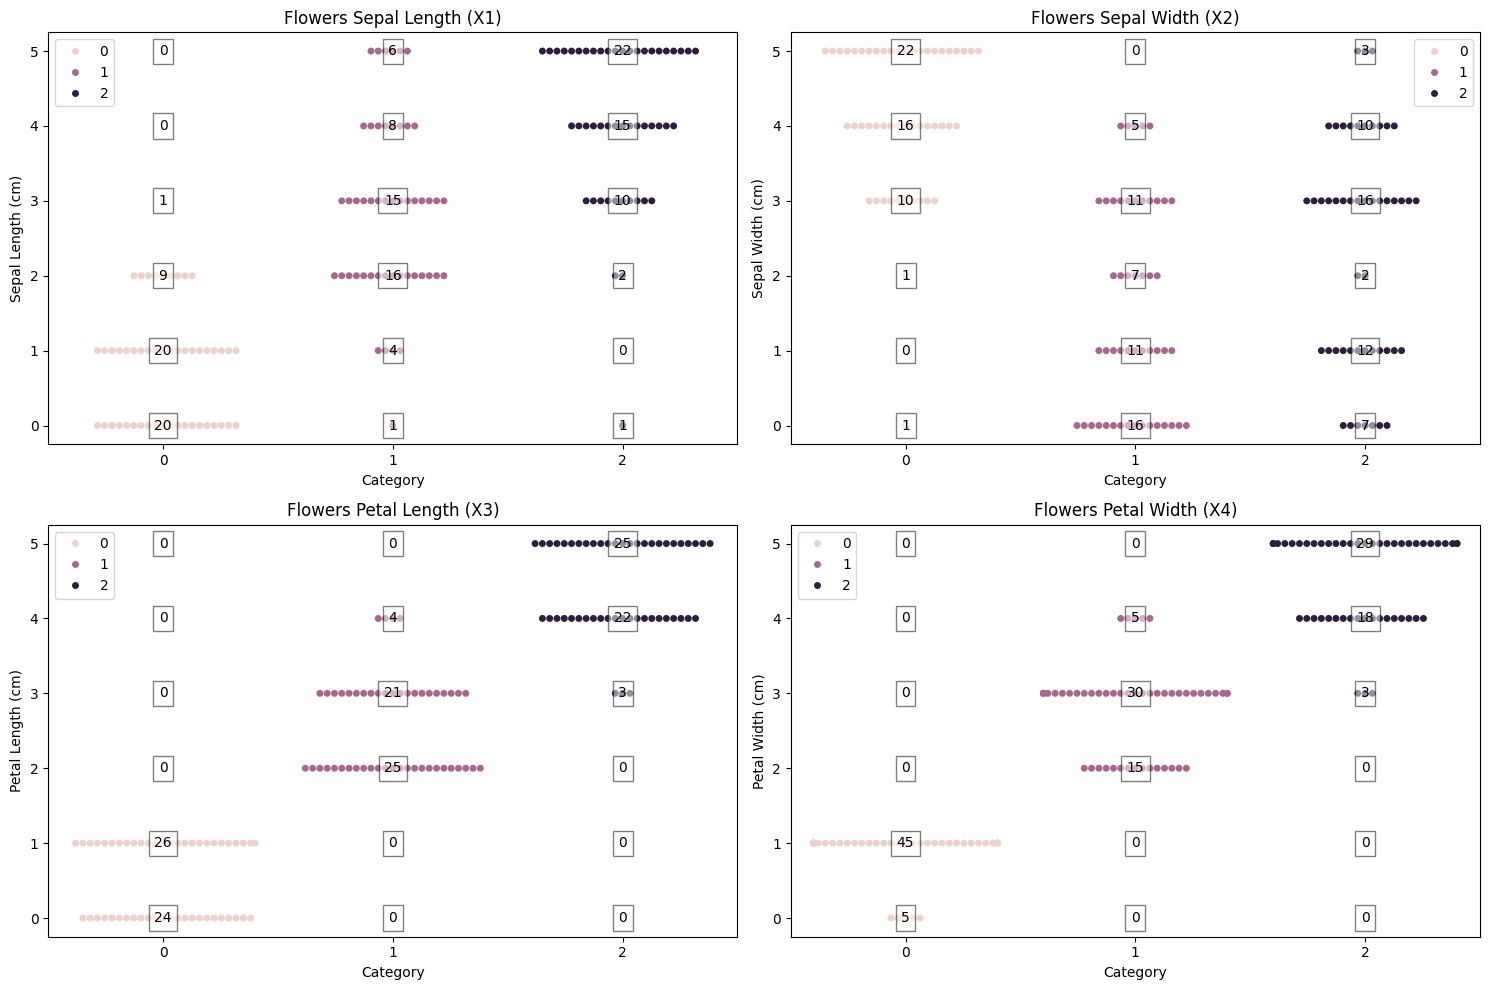

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import KBinsDiscretizer
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.categorical")

# Load the iris dataset
iris = load_iris()
y = iris.target

# Feature names and titles for the plots
features = iris.data.T
titles = [
    'Flowers Sepal Length (X1)',
    'Flowers Sepal Width (X2)',
    'Flowers Petal Length (X3)',
    'Flowers Petal Width (X4)'
]
y_labels = [
    'Sepal Length (cm)',
    'Sepal Width (cm)',
    'Petal Length (cm)',
    'Petal Width (cm)'
]

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Initialize a list to store bin edges and bin counts
bin_edges_list = []
bin_counts_dict = {title: [] for title in titles}

# Plot each feature in a subplot and calculate bin counts
for i, ax in enumerate(axes.flat):
    X = features[i].reshape(-1, 1)
    enc = KBinsDiscretizer(n_bins=6, encode='ordinal').fit(X)
    
    X_binned = enc.transform(X).squeeze()
    
    # Count the values in each bin for each class
    bin_counts = np.zeros((3, 6), dtype=int)  # 3 classes, 6 bins
    for class_label in np.unique(y):
        class_binned = X_binned[y == class_label]
        bin_counts[class_label] = np.bincount(class_binned.astype(int), minlength=6)
    
    # Store bin counts for table creation
    bin_counts_dict[titles[i]] = bin_counts
    
    # Plot the swarmplot
    sns.swarmplot(ax=ax, x=y, y=X_binned, hue=y)
    ax.set_title(titles[i])
    ax.set_xlabel('Category')
    ax.set_ylabel(y_labels[i])
    
    # Annotate the bin counts on the plot
    for bin_idx in range(6):
        for class_label in range(3):
            count = bin_counts[class_label, bin_idx]
            ax.text(class_label, bin_idx, str(count), horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
    
    # Store bin edges for reference
    bin_edges_list.append(enc.bin_edges_[0])

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

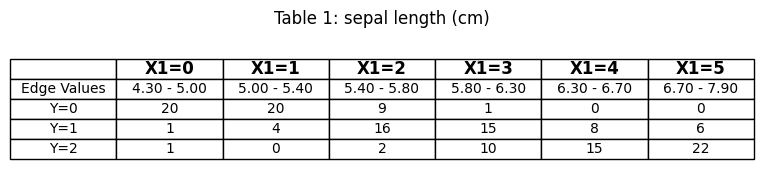

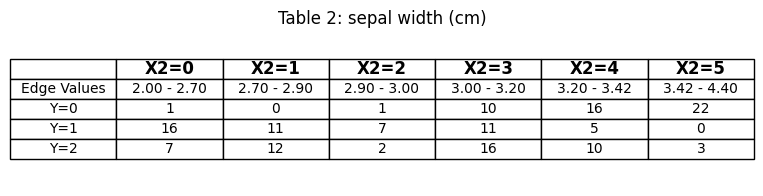

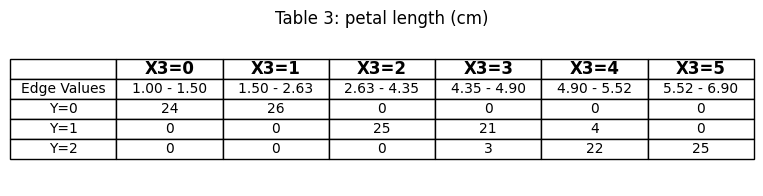

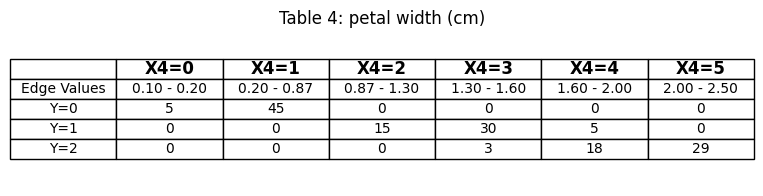

In [20]:
import matplotlib.pyplot as plt

def generate_table(bin_counts, bin_edges, feature_name, y_label, table_number):
    # Prepare table data
    table_data = []
    
    # Add bin edges as the second row
    bin_edges_row = [f'{bin_edges[j]:.2f} - {bin_edges[j+1]:.2f}' for j in range(len(bin_edges) - 1)]
    bin_edges_row.insert(0, 'Edge Values')  # Add label for the bin edges row
    table_data.append(bin_edges_row)
    
    # Add bin counts for each class
    for class_label in range(3):
        row = list(bin_counts[class_label])
        row.insert(0, f'Y={class_label}')  # Add class label at the beginning of each row
        table_data.append(row)
    
    # Create a new figure for the table
    fig, ax = plt.subplots(figsize=(8, 2))  # Smaller width and bigger height
    ax.axis('tight')
    ax.axis('off')
    
    # Create the table with bin edges in the column labels
    col_labels = [''] + [f'{feature_name}={j}' for j in range(len(bin_edges) - 1)]
    table = ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    
    # Make the header bigger
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
    
    # Set the title
    ax.set_title(f'Table {table_number}: {y_label}')
    
    # Show the table
    plt.show()

# Generate tables for each feature
for i, title in enumerate(titles):
    generate_table(bin_counts_dict[title], bin_edges_list[i], f'X{i+1}', y_labels[i], i + 1)

Lets say now i have a new specimen X1=2, X2=3, what is the most probable class?

To calculate $P(y|x_{1},..,x_{n}) \propto P(y)\prod_{i=1}^{n}{P(x_{i}|y)}$ 

We just look up the tables we have created:

$P(Y=0 | X1=2, X2=3)\propto (1/3)(0/50)(1/50)$

This is the probability of belonging to Class Y=0, given that the data we have is X1=2 and X2=3.

One of the values is zero, in case this we use a small value instead of zero so that the zero will not mask out other contribution from different attribute.

$P(Y=0 | X1=2, X2=3) \propto (1/3)(1/50)(1/50) = 0.00013$

### Question

1. Calculate the rest to find out which class is most probable for new specimen X1=2, X2=3
2. Calculate which class is most probable if the sepal length=5.1 and petal length=3.0 



### Answer



1. Based on the Probability below, the specimen is most likely in category Y=1.

In [6]:
print("P(Y=0 | X1=2 | X2 = 3) = {:.3f}".format(1/3 * 9/50 * 10/50))
print("P(Y=1 | X1=2 | X2 = 3) = {:.3f}".format(1/3 * 16/50 * 11/50))
print("P(Y=2 | X1=2 | X2 = 3) = {:.3f}".format(1/3 * 2/50 * 16/50))

P(Y=0 | X1=2 | X2 = 3) = 0.012
P(Y=1 | X1=2 | X2 = 3) = 0.023
P(Y=2 | X1=2 | X2 = 3) = 0.004


2. Based on Table 1, Sepal Length = 5.1 cm is categorized as bin `X1=1`. Table 3 shown the petal length 3.0 categorized as = `X3=2`.


In [5]:
print("P(Y=0 | X1=2 | X2 = 3) = {:.3f}".format(1/3 * 20/50 * 1/50))
print("P(Y=1 | X1=2 | X2 = 3) = {:.3f}".format(1/3 * 4/50 * 21/50))
print("P(Y=2 | X1=2 | X2 = 3) = {:.3f}".format(1/3 * 1/50 * 3/50))

P(Y=0 | X1=2 | X2 = 3) = 0.003
P(Y=1 | X1=2 | X2 = 3) = 0.011
P(Y=2 | X1=2 | X2 = 3) = 0.000


Based on the probability calculation above, the flower is most likely in category Y=1

2. Given Sepal Length (X1 = 5.1cm) & Petal Length (X3 = 3cm). Hence, we must categorized the Petal Length to see the over all X3.


Given data as below:

    @attribute outlook {sunny, overcast, rainy}
    @attribute temperature {high, low}
    @attribute humidity {high, low}
    @attribute windy {TRUE, FALSE}
    @class     play {yes, no}

    @data
    sunny,high,high,FALSE,no
    sunny,high,high,TRUE,no
    overcast,high,high,FALSE,yes
    rainy,low,high,FALSE,yes
    rainy,low,high,FALSE,yes
    rainy,low,low,TRUE,no
    overcast,low,low,TRUE,yes
    sunny,high,high,FALSE,no
    sunny,low,high,FALSE,yes
    rainy,high,high,FALSE,yes
    sunny,high,low,TRUE,yes
    overcast,high,high,TRUE,yes
    overcast,high,high,FALSE,yes
    rainy,high,high,TRUE,no


### Question 
1. Should i play if outlook=ovecast, temperate=low, humidity=high, windy=TRUE?

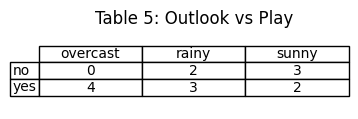

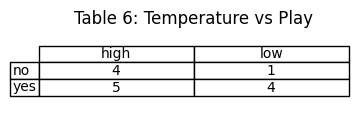

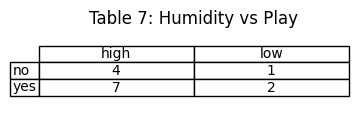

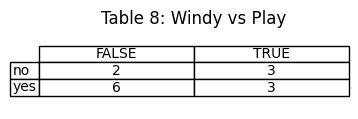

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temperature': ['high', 'high', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'high', 'high', 'high', 'high', 'high'],
    'humidity': ['high', 'high', 'high', 'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low', 'high', 'high', 'high'],
    'windy': ['FALSE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE'],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to create and display a table for each attribute
def create_table(attribute, table_number):
    # Create a crosstab to count the occurrences of each combination of attribute and play
    table = pd.crosstab(df[attribute], df['play']).T  # Transpose the table
    
    # Plot the table
    fig, ax = plt.subplots(figsize=(4, 1))  # Adjust the figure size for better readability
    ax.axis('tight')
    ax.axis('off')
    
    # Create the table
    ax.table(cellText=table.values, colLabels=table.columns, rowLabels=table.index, cellLoc='center', loc='center')
    
    # Set the title
    ax.set_title(f'Table {table_number}: {attribute.capitalize()} vs Play')
    
    # Show the table
    plt.show()

# Create tables for each attribute
attributes = ['outlook', 'temperature', 'humidity', 'windy']
for i, attribute in enumerate(attributes, start=5):
    create_table(attribute, i)

In [24]:
print("P(Play=no | Outlook=Overcast | Temperature=low | Humidity=high | Windy=TRUE) = {:.4f}".format(5/14 * 1/5 * 1/5 * 4/5 * 3/5))
print("P(Play=yes | Outlook=Overcast | Temperature=low | Humidity=high | Windy=TRUE) = {:.4f}".format(9/14 * 4/9 * 4/9 * 7/9 * 3/9))

P(Play=no | Outlook=Overcast | Temperature=low | Humidity=high | Windy=TRUE) = 0.0069
P(Play=yes | Outlook=Overcast | Temperature=low | Humidity=high | Windy=TRUE) = 0.0329


## Answer
Based on the probability calculation above, it's most likely to `Play=Yes`